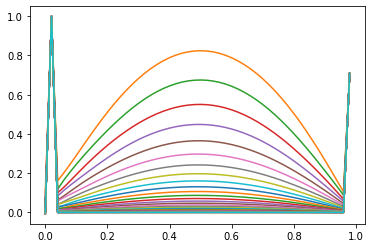

<Figure size 72x72 with 0 Axes>

In [2]:
#Solving parabolic equation with Cranck Nicolson method 
import numpy as np
import math
import matplotlib.pyplot as plt

#Declaring variables, vectors and arrays
h= 0.02
l=25
n = 1+l
b = (-l)/2
c = 1-l+(-5*h)
d = l/2
m= 50
g= 50000

w= np.zeros(m)
x = np.zeros(m)
P = np.zeros([m,m])
A = np.zeros([m,m])
B = np.zeros([m,m])

#Vector x with the spacial step
for i in range(m):
    x[i]= i*h
    
#Matrix A 
for i in range(m):
        A[i][i] = n
        A[i][i-1] = b
        A[i-1][i] = b
        A[0][m-1] = 0
        A[m-1][0] = 0
#Matrix B
for i in range(m):
        B[i][i] = c
        B[i][i-1] = d
        B[i-1][i] = d
        B[0][m-1] = 0
        B[m-1][0] = 0

#np.set_printoptions(threshold=np.inf) to see the whole matrix

#Inverse of matrix A
Ainv=np.linalg.inv(A)

#Multiplying inverse of matrix A and matrix B 
S= np.dot(Ainv,B)

#Vector w with initial condition for every x 
for i in range(m):
    w[i] = 4*(i*h)-4*(i*h)**2
    
#Multiplying this first vector w with matrix S, remember that is the multiplication of A^-1 and B
G = w.dot(S)

#Multiplying every vector created by S and save them in matrix P column by column
for i in range(m):
    P[:,1] = G
    P[:,i] = P[:,i-1].dot(S)

#Changing the first and last row of matrix P by the initial conditions in x=0 and x=1 
for i in range(m):
    P[1][i] = math.sin(math.pi/2)
    P[m-1][i] = math.sin(3*math.pi/4)
    
#Plot P and x 
plt.plot(x,P)
plt.figure(figsize=(1,1))
plt.savefig('graph.png')

plt.show()

